In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge

In [150]:
features = pd.read_csv('C:/Users/Sarath Angathil/Desktop/indeed_data_science_exercise/train_features_2013-03-07.csv')
salaries = pd.read_csv('C:/Users/Sarath Angathil/Desktop/indeed_data_science_exercise/train_salaries_2013-03-07.csv')
test_features = pd.read_csv('C:/Users/Sarath Angathil/Desktop/indeed_data_science_exercise/test_features_2013-03-07.csv')

In [151]:
features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [152]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [153]:
salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [154]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [155]:
# checking Missing values and data validation
print('job Id is unique.') if features.jobId.nunique() == features.shape[0] else print('oops')
print('Train and test sets are distinct.') if len(np.intersect1d(features.jobId.values, test_features.jobId.values))== 0 else print('oops')
print('We do not need to worry about missing values.') if features.count().min() == features.shape[0] and test_features.count().min() == test_features.shape[0] else print('oops')

job Id is unique.
Train and test sets are distinct.
We do not need to worry about missing values.


In [156]:
#merging the dataset
data_salary = pd.merge(features, salaries, how = "left", on= "jobId")
data = data_salary.iloc[:,np.r_[0:1,2:9]]
dataset = data


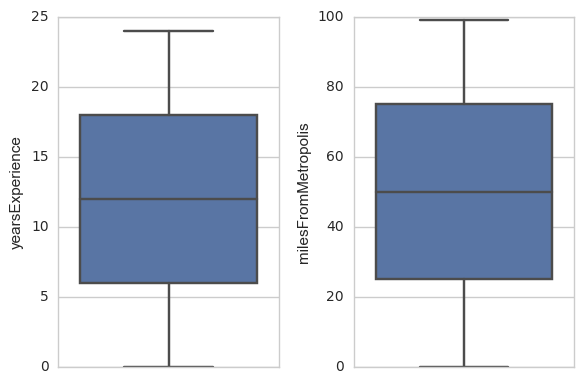

In [157]:
#boxplot

sns.set(style="whitegrid")
fig, axes = plt.subplots(1,2)
sns.boxplot( y=dataset['yearsExperience'], ax=axes[0], width=0.8)
sns.boxplot( y=dataset['milesFromMetropolis'], ax=axes[1],width=0.8)  
plt.tight_layout()

In [158]:
dataset.head()

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [159]:
#data tranformation
#converting categorical features to dummy variables
train5 = data
train_converted = pd.get_dummies(data.iloc[:,1:])
print(train_converted.head())
#splitting the data into train and test(validation) set
#train set taken by random sampling 80% of the dataset
train = train_converted.sample(frac=0.80,random_state= 100)
#validate set is taken as the remaining 30% of the dataset
validate = train_converted.drop(train.index)
#predictor features in the train data set
train_feature = train.iloc[:,np.r_[0:2,3:32]]
#response variable in the train data set
train_salary  = train.iloc[:,2]
#predictor variable in the validation data set 
validate_feature  = validate.iloc[:,np.r_[0:2,3:32]]
#response variable in the validation data set
validate_salary   = validate.iloc[:,2]
print(train.shape)

   yearsExperience  milesFromMetropolis  salary  jobType_CEO  jobType_CFO  \
0               10                   83     130          0.0          1.0   
1                3                   73     101          1.0          0.0   
2               10                   38     137          0.0          0.0   
3                8                   17     142          0.0          0.0   
4                8                   16     163          0.0          0.0   

   jobType_CTO  jobType_JANITOR  jobType_JUNIOR  jobType_MANAGER  \
0          0.0              0.0             0.0              0.0   
1          0.0              0.0             0.0              0.0   
2          0.0              0.0             0.0              0.0   
3          0.0              0.0             0.0              1.0   
4          0.0              0.0             0.0              0.0   

   jobType_SENIOR      ...       major_MATH  major_NONE  major_PHYSICS  \
0             0.0      ...              1.0         0.

In [160]:
#REGRESSION MODEL
reg = linear_model.LinearRegression()
# training the model using linear regression
reg.fit(train_feature,train_salary)
# predicting the response variable in the validation data set 
salary_predictions = reg.predict(validate_feature)
print("salary_predictions",salary_predictions)
test_processed = pd.get_dummies(test_features.iloc[:,2:])
test_processed  = test_processed.iloc[:,np.r_[:,:31]]
print(train_feature.columns)
test_pred = test_processed
test_salary_predictions = reg.predict(test_pred)

salary_predictions [ 113.16260529  138.46614075  131.84366608 ...,  126.86165619  108.75695038
   64.25235748]
Index(['yearsExperience', 'milesFromMetropolis', 'jobType_CEO', 'jobType_CFO',
       'jobType_CTO', 'jobType_JANITOR', 'jobType_JUNIOR', 'jobType_MANAGER',
       'jobType_SENIOR', 'jobType_VICE_PRESIDENT', 'degree_BACHELORS',
       'degree_DOCTORAL', 'degree_HIGH_SCHOOL', 'degree_MASTERS',
       'degree_NONE', 'major_BIOLOGY', 'major_BUSINESS', 'major_CHEMISTRY',
       'major_COMPSCI', 'major_ENGINEERING', 'major_LITERATURE', 'major_MATH',
       'major_NONE', 'major_PHYSICS', 'industry_AUTO', 'industry_EDUCATION',
       'industry_FINANCE', 'industry_HEALTH', 'industry_OIL',
       'industry_SERVICE', 'industry_WEB'],
      dtype='object')


In [161]:
#Evaluation
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(validate_salary,salary_predictions)))
print('Variance Explained (R^2): ', r2_score(validate_salary, salary_predictions))
# The coefficients
print('Coefficients: \n', reg.coef_)

Root Mean Squared Error:  19.5982040944
Variance Explained (R^2):  0.743865065016
Coefficients: 
 [  2.01128625e+00  -3.99787949e-01   5.01453587e+10   5.01453587e+10
   5.01453587e+10   5.01453586e+10   5.01453587e+10   5.01453587e+10
   5.01453587e+10   5.01453587e+10  -9.81910018e+09  -9.81910017e+09
  -9.81910019e+09  -9.81910018e+09  -9.81910019e+09  -1.39770718e+09
  -1.39770717e+09  -1.39770718e+09  -1.39770717e+09  -1.39770717e+09
  -1.39770718e+09  -1.39770717e+09  -1.39770718e+09  -1.39770718e+09
   4.70677237e+09   4.70677236e+09   4.70677239e+09   4.70677238e+09
   4.70677239e+09   4.70677237e+09   4.70677238e+09]


In [162]:
#kfoldcrossvalidation
crossvalidation = KFold(n=train_feature.shape[0], n_folds=10,shuffle=True, random_state=1)
scores = cross_val_score(reg,train_feature,train_salary, cv=5)
rmse_scores = np.sqrt(scores)
print(rmse_scores)

[ 0.86240393  0.86279793  0.86080231  0.86219095  0.86289943]


In [163]:
scores = cross_val_score(reg,train_feature,train_salary, cv=10)
rmse_scores = np.sqrt(scores)
print(rmse_scores)

[ 0.86196774  0.86283952  0.86252759  0.86306715  0.86153855  0.86006601
  0.86279683  0.86156695  0.86284304  0.86295582]


In [164]:
# Test Salaries creation
test_processed = pd.get_dummies(test_features.iloc[:,2:])
test_processed  = test_processed.iloc[:,np.r_[:,:30]]
test_features =pd.DataFrame(test_features)
test_salary_predictions = pd.DataFrame(test_salary_predictions)
data_merge = pd.merge(test_processed, test_salary_predictions, left_index=True, right_index=True)
data_final = pd.merge(test_features,data_merge,left_index=True,right_index=True)
data_test = data_final
data_final = data_final.iloc[:,np.r_[0,38]]
data_test_2 = data_final
data_final.columns = ['jobId','salary']
data_final.to_csv("test_salaries.csv")
print(data_final.head())

              jobId      salary
0  JOB1362685407687  115.684685
1  JOB1362685407688   92.164703
2  JOB1362685407689  166.916748
3  JOB1362685407690  105.453621
4  JOB1362685407691  118.939308


In [165]:
# Ridge Regression

clf = Ridge(alpha=0.09)
clf.fit(train_feature,train_salary)
salary_predictions = clf.predict(validate_feature)
print("salary_predictions",salary_predictions)
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(validate_salary,salary_predictions)))
print('Variance Explained (R^2): ', r2_score(validate_salary, salary_predictions))

salary_predictions [ 113.16248638  138.46612525  131.84364937 ...,  126.86185406  108.75692017
   64.25236164]
Root Mean Squared Error:  19.598204428
Variance Explained (R^2):  0.743865056296


In [166]:
# Lasso Regression

clf = linear_model.Lasso(alpha=0.1)
clf.fit(train_feature,train_salary)
salary_predictions = clf.predict(validate_feature)
print(clf.coef_)
print("salary_predictions",salary_predictions)
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(validate_salary,salary_predictions)))
print('Variance Explained (R^2): ', r2_score(validate_salary, salary_predictions))

[  2.0094031   -0.39968356  28.22253211  18.42680706  18.52105128
 -32.89356056 -19.89784872  -0.          -9.92495314   8.30938996  -0.
   9.48058947  -4.18207301   4.42605373  -7.9046418   -0.8020208
   3.58060725  -0.           0.           6.34816115  -4.29220359
   0.94822098  -9.01056318  -0.          -5.56424676 -15.56369744
  14.2074612   -0.          14.36241955 -10.54760863   5.18288529]
salary_predictions [ 112.08653718  137.71848175  130.33911311 ...,  127.0162654   105.51293599
   66.14434544]
Root Mean Squared Error:  19.6596809707
Variance Explained (R^2):  0.742255624401


In [167]:
#Random Forest regressor

data = data_salary.iloc[:,np.r_[2:9]]
print(data.head())
jobtype  = {'jobType':['CFO','CEO','VICE_PRESIDENT','MANAGER','JUNIOR','JANITOR','CTO','SENIOR'],'jobTypenumber':[1,2,3,4,5,6,7,8]}
jobtype = pd.DataFrame(jobtype)
data = pd.merge(data,jobtype,how="left",on ="jobType")
degree = {'degree':['MASTERS','HIGH_SCHOOL','DOCTORAL','BACHELORS','NONE'],'degreenumber':[1,2,3,4,5]}
degree = pd.DataFrame(degree)
data = pd.merge(data,degree,how="left",on="degree")
major = {'major':['MATH','NONE','PHYSICS','CHEMISTRY','COMPSCI','BIOLOGY','LITERATURE','BUSINESS','ENGINEERING'],'majornumber':[1,2,3,4,5,6,7,8,9]}
major = pd.DataFrame(major)
data = pd.merge(data,major,how="left",on="major")
industry = {'industry':['HEALTH','WEB','AUTO','FINANCE','EDUCATION','OIL','SERVICE'],'industrynumber':[1,2,3,4,5,6,7]}
industry = pd.DataFrame(industry)
data = pd.merge(data,industry,how="left",on = "industry")
print("old",data.head())
data = data.iloc[:,np.r_[4:11]]
print("new",data.head())
train =  data.sample(frac=0.80,random_state= 100)
validate = data.drop(train.index)
#predictor features in the train data set
train_feature = train.iloc[:,np.r_[0:2,3:7]]
#response variable in the train data set
train_salary  = train.iloc[:,2]  
print("train_feature",train_feature.head())
print("train_salary",train_salary.head())
#predictor variable in the validation data set 
validate_feature  = validate.iloc[:,np.r_[0:2,3:7]]
#response variable in the validation data set
validate_salary   = validate.iloc[:,2]
print(" validate_feature", validate_feature.head())
print("validate_salary",validate_salary.head())
regr = RandomForestRegressor()
regr.fit(train_feature,train_salary)
x = regr.feature_importances_
print("feature importance",x)
salary_predictions = regr.predict(validate_feature)
print("salary_predictions",salary_predictions)
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(validate_salary,salary_predictions)))
print('Variance Explained (R^2): ', r2_score(validate_salary, salary_predictions))

          jobType       degree      major industry  yearsExperience  \
0             CFO      MASTERS       MATH   HEALTH               10   
1             CEO  HIGH_SCHOOL       NONE      WEB                3   
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH               10   
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO                8   
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE                8   

   milesFromMetropolis  salary  
0                   83     130  
1                   73     101  
2                   38     137  
3                   17     142  
4                   16     163  
old           jobType       degree      major industry  yearsExperience  \
0             CFO      MASTERS       MATH   HEALTH               10   
1             CEO  HIGH_SCHOOL       NONE      WEB                3   
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH               10   
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO                8   
4  VICE_PRESIDEN